# Naive CAPM Calculations #

### CAPM Model using Simple Linear Regression Model ###

In [2]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from data_downloader import get_market_data

In [3]:
# Stock Data
ticker = 'NVDA'

df_stock = get_market_data(
        ticker=ticker, 
        start_date='2015-01-01', 
        end_date='2025-01-01', 
        returns=True
    )

df_stock

Price,close,high,low,open,volume,returns
Date,,,,,,
2015-01-05,0.474906,0.484505,0.472747,0.483066,197952000,-0.017035
2015-01-06,0.460508,0.476106,0.460028,0.475626,197764000,-0.030787
2015-01-07,0.459308,0.467947,0.457868,0.463868,321808000,-0.002609
2015-01-08,0.476586,0.479466,0.464348,0.464588,283780000,0.036927
2015-01-09,0.478506,0.482106,0.471787,0.478266,209540000,0.004020
...,...,...,...,...,...,...
2024-12-24,140.197372,141.877094,138.627618,139.977407,105157000,0.003930
2024-12-26,139.907410,140.827275,137.707768,139.677451,116205600,-0.002070
2024-12-27,136.987885,138.997570,134.688268,138.527645,170582600,-0.021088


In [9]:
# We will use the 10-year bond rate as the RFR
rf = pd.read_csv(r'..\additional_data\risk_free_rate.csv')
rf.set_index('Date', inplace=True)
rf.index = pd.to_datetime(rf.index)
rf = rf.loc['2015-01-05':]

rf

,risk_free_rate
Date,
2015-01-05,0.000057
2015-01-06,0.000055
2015-01-07,0.000054
2015-01-08,0.000056
2015-01-09,0.000055
...,...
2024-12-24,0.000128
2024-12-26,0.000127
2024-12-27,0.000128


In [10]:
# Benchmark Data
data_benchmark = pd.read_csv(r'..\additional_data\benchmark_returns.csv')
data_benchmark.set_index('Date', inplace=True)
data_benchmark.index = pd.to_datetime(data_benchmark.index)
data_benchmark = data_benchmark.loc['2015-01-05':]

data_benchmark

,benchmark_returns
Date,
2015-01-05,-0.018447
2015-01-06,-0.008933
2015-01-07,0.011563
2015-01-08,0.017730
2015-01-09,-0.008439
...,...
2024-12-24,0.010982
2024-12-26,-0.000406
2024-12-27,-0.011117


In [11]:
# Create the DataFrame
data = pd.DataFrame()

data['stock'] = df_stock['returns']
data['risk_free_rate'] = rf['risk_free_rate']
data['benchmark'] = data_benchmark['benchmark_returns']

data = data.dropna()

data

,stock,risk_free_rate,benchmark
Date,,,
2015-01-05,-0.017035,0.000057,-0.018447
2015-01-06,-0.030787,0.000055,-0.008933
2015-01-07,-0.002609,0.000054,0.011563
2015-01-08,0.036927,0.000056,0.017730
2015-01-09,0.004020,0.000055,-0.008439
...,...,...,...
2024-12-24,0.003930,0.000128,0.010982
2024-12-26,-0.002070,0.000127,-0.000406
2024-12-27,-0.021088,0.000128,-0.011117


In [13]:
# We use the excess returns
data['stock_excess'] = data['stock'] - data['risk_free_rate']
data['market_excess'] = data['benchmark'] - data['risk_free_rate']
data.dropna(inplace = True)

data

,stock,risk_free_rate,benchmark,stock_excess,market_excess
Date,,,,,
2015-01-05,-0.017035,0.000057,-0.018447,-0.017091,-0.018504
2015-01-06,-0.030787,0.000055,-0.008933,-0.030842,-0.008988
2015-01-07,-0.002609,0.000054,0.011563,-0.002663,0.011508
2015-01-08,0.036927,0.000056,0.017730,0.036871,0.017674
2015-01-09,0.004020,0.000055,-0.008439,0.003965,-0.008494
...,...,...,...,...,...
2024-12-24,0.003930,0.000128,0.010982,0.003803,0.010855
2024-12-26,-0.002070,0.000127,-0.000406,-0.002198,-0.000533
2024-12-27,-0.021088,0.000128,-0.011117,-0.021217,-0.011246


In [14]:
# We know how to calculate a beta, but not a rolling beta
data['rolling_cov'] = data['stock_excess'].rolling(window=252).cov(data['market_excess'])
data['rolling_var_market'] = data['market_excess'].rolling(window=252).var()

# Rolling beta
data['rolling_beta'] = data['rolling_cov'] / data['rolling_var_market']

data.dropna()

,stock,risk_free_rate,benchmark,stock_excess,market_excess,rolling_cov,rolling_var_market,rolling_beta
Date,,,,,,,,
2016-01-04,-0.018063,0.000062,-0.015422,-0.018125,-0.015484,0.000113,0.000096,1.169432
2016-01-05,0.015937,0.000062,0.002010,0.015874,0.001948,0.000111,0.000095,1.172325
2016-01-06,-0.042230,0.000060,-0.013202,-0.042290,-0.013263,0.000113,0.000095,1.179864
2016-01-07,-0.040452,0.000060,-0.023986,-0.040512,-0.024046,0.000117,0.000097,1.202562
2016-01-08,-0.021700,0.000059,-0.010898,-0.021759,-0.010957,0.000115,0.000096,1.197180
...,...,...,...,...,...,...,...,...
2024-12-24,0.003930,0.000128,0.010982,0.003803,0.010855,0.000167,0.000063,2.667374
2024-12-26,-0.002070,0.000127,-0.000406,-0.002198,-0.000533,0.000167,0.000063,2.668394
2024-12-27,-0.021088,0.000128,-0.011117,-0.021217,-0.011246,0.000168,0.000063,2.663226


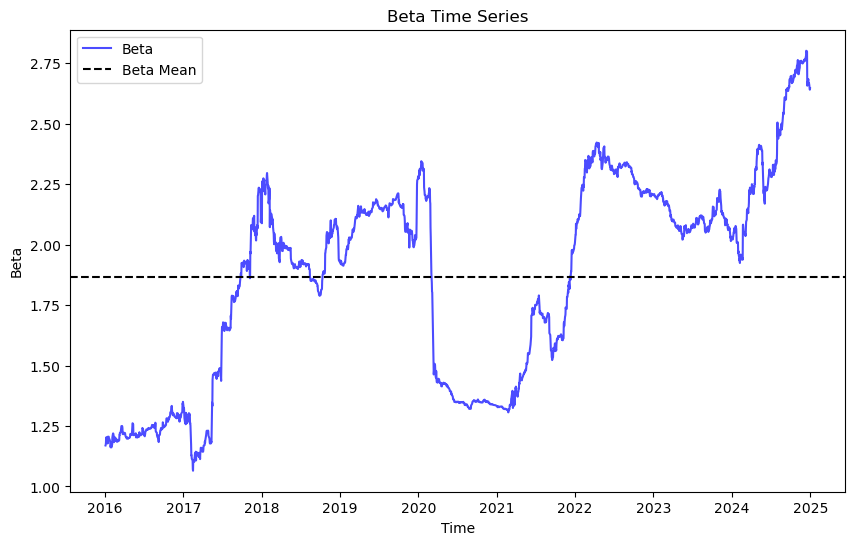

In [15]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(data['rolling_beta'], label='Beta', color='blue', alpha=0.7)
plt.axhline(y=data['rolling_beta'].mean(), color='black', linestyle='dashed', label='Beta Mean')

# Config
plt.title('Beta Time Series')
plt.xlabel('Time')
plt.ylabel('Beta')
plt.legend()

# Show
plt.show()

In [16]:
# Now we are interested in getting the alpha
data['rolling_avg_stock'] = data['stock_excess'].rolling(window=252).mean()
data['rolling_avg_market'] = data['market_excess'].rolling(window=252).mean()

data['rolling_alpha'] = data['rolling_avg_stock'] - data['rolling_beta'] * data['rolling_avg_market']

data.dropna()

,stock,risk_free_rate,benchmark,stock_excess,market_excess,rolling_cov,rolling_var_market,rolling_beta,rolling_avg_stock,rolling_avg_market,rolling_alpha
Date,,,,,,,,,,,
2016-01-04,-0.018063,0.000062,-0.015422,-0.018125,-0.015484,0.000113,0.000096,1.169432,0.001891,-0.000148,0.002064
2016-01-05,0.015937,0.000062,0.002010,0.015874,0.001948,0.000111,0.000095,1.172325,0.002022,-0.000067,0.002100
2016-01-06,-0.042230,0.000060,-0.013202,-0.042290,-0.013263,0.000113,0.000095,1.179864,0.001976,-0.000084,0.002075
2016-01-07,-0.040452,0.000060,-0.023986,-0.040512,-0.024046,0.000117,0.000097,1.202562,0.001826,-0.000225,0.002097
2016-01-08,-0.021700,0.000059,-0.010898,-0.021759,-0.010957,0.000115,0.000096,1.197180,0.001594,-0.000339,0.001999
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.003930,0.000128,0.010982,0.003803,0.010855,0.000167,0.000063,2.667374,0.004071,0.000833,0.001849
2024-12-26,-0.002070,0.000127,-0.000406,-0.002198,-0.000533,0.000167,0.000063,2.668394,0.004026,0.000815,0.001852
2024-12-27,-0.021088,0.000128,-0.011117,-0.021217,-0.011246,0.000168,0.000063,2.663226,0.003931,0.000765,0.001894


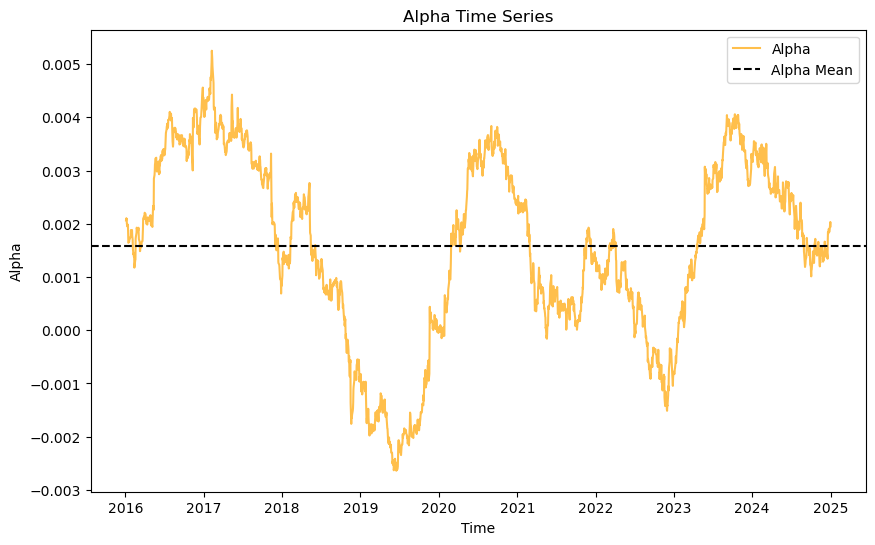

In [17]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(data['rolling_alpha'], label='Alpha', color='orange', alpha=0.7)
plt.axhline(y=data['rolling_alpha'].mean(), color='black', linestyle='dashed', label='Alpha Mean')

# Config
plt.title('Alpha Time Series')
plt.xlabel('Time')
plt.ylabel('Alpha')
plt.legend()

# Show
plt.show()

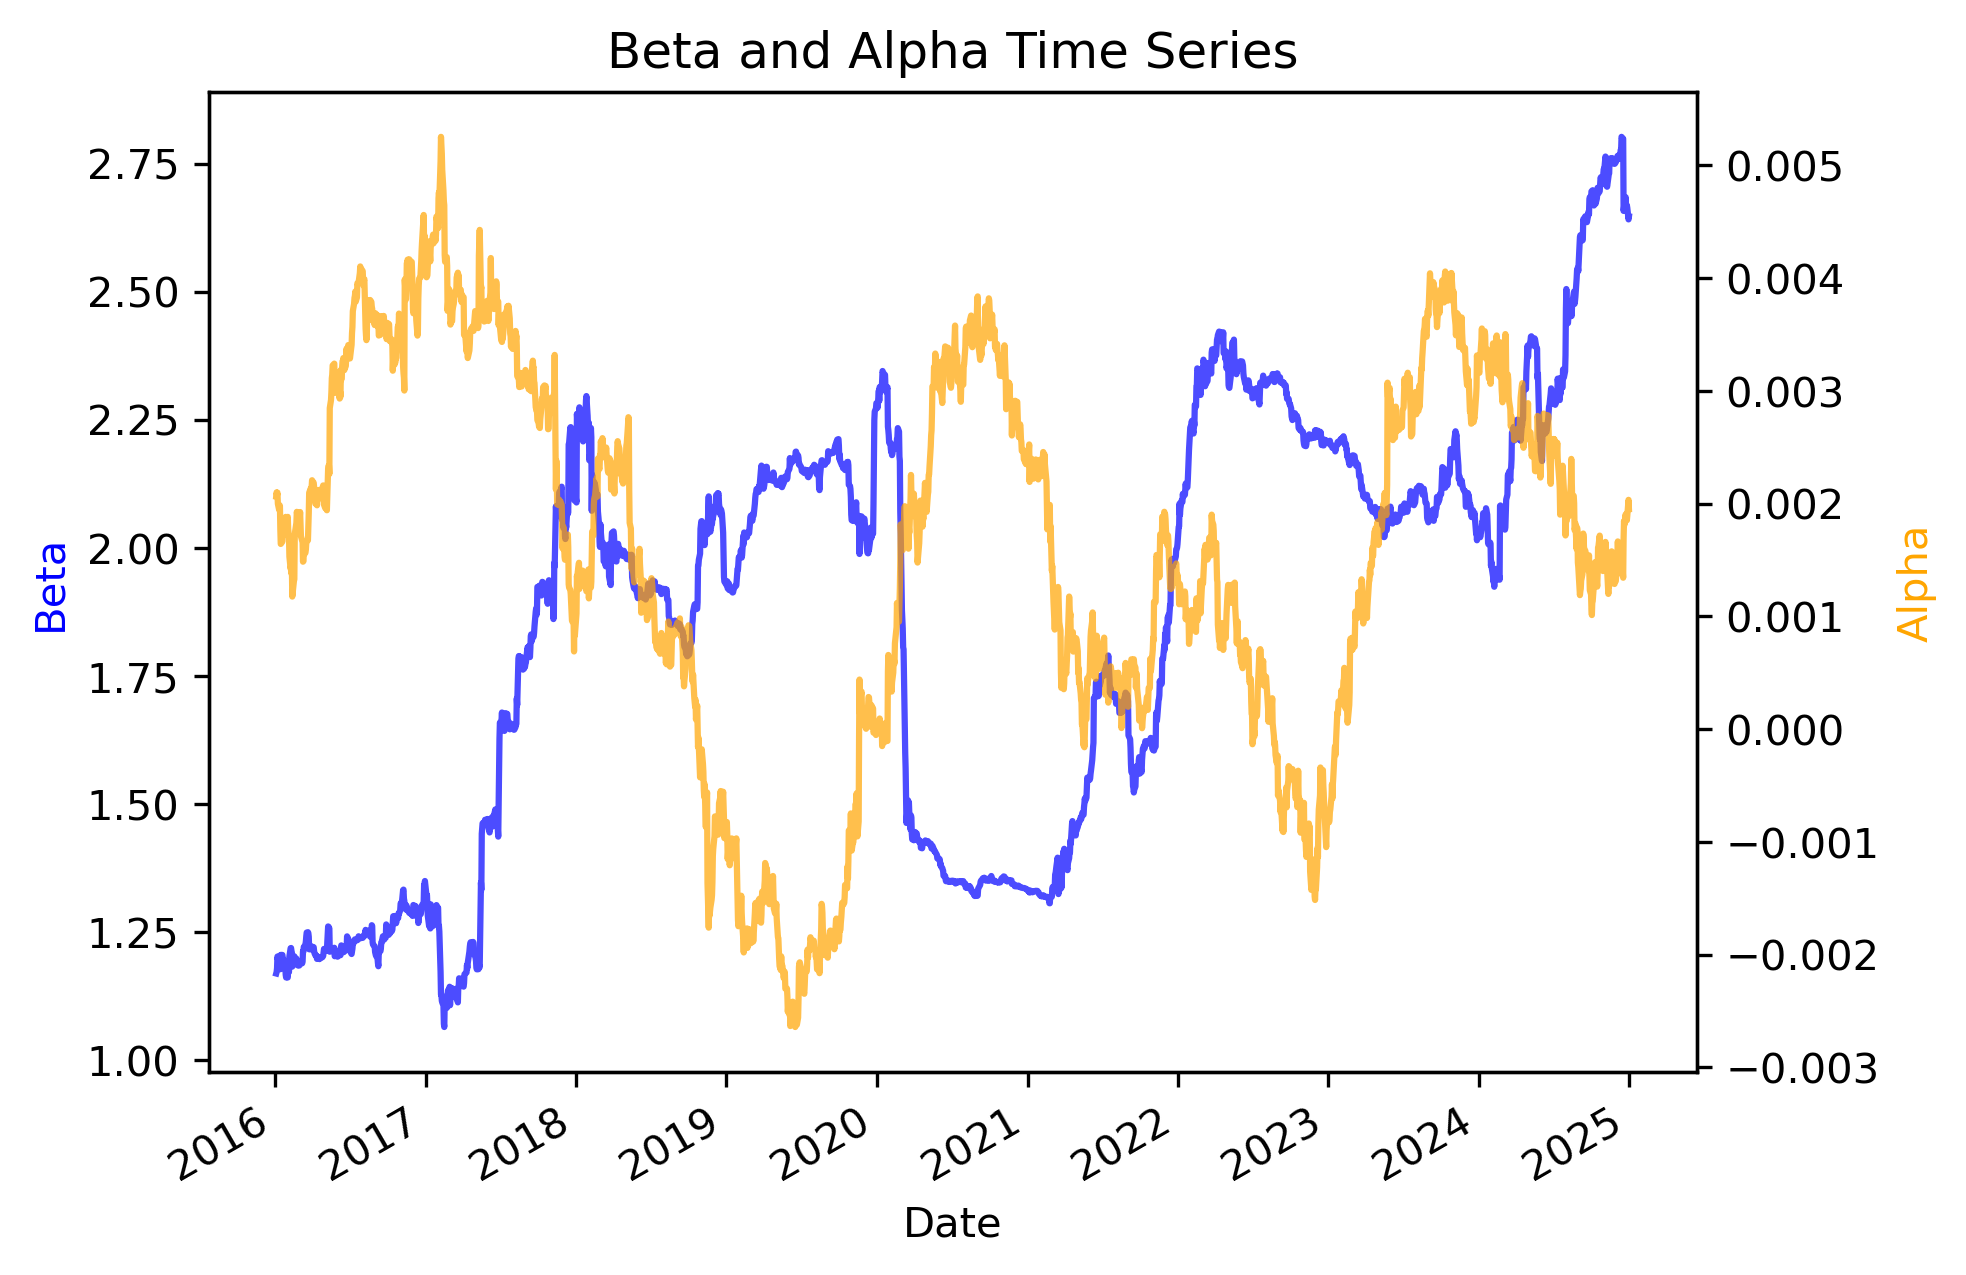

In [18]:
# Create Figure
fig, ax1 = plt.subplots(dpi = 300)

# Rolling Beta
data['rolling_beta'].plot(color = 'blue', ax = ax1, alpha=0.7)
ax1.set_xlabel('Date')
ax1.set_ylabel(
    'Beta', 
    color='blue'
    )

# Rolling Alpha
ax2 = ax1.twinx()

data['rolling_alpha'].plot(color = 'orange', ax = ax2, alpha=0.7)
ax2.set_ylabel(
    'Alpha', 
    color='orange'
    )

plt.title('Beta and Alpha Time Series')
plt.show()

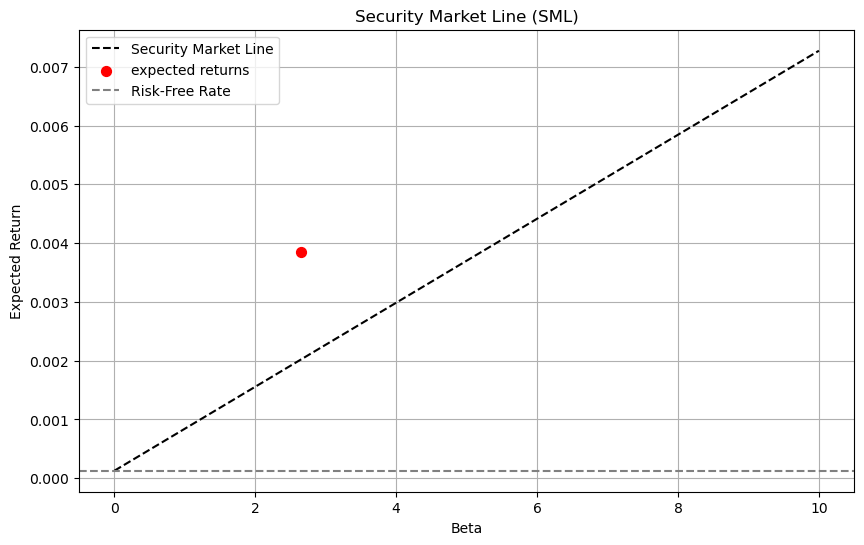

In [20]:
# Security Market Line
# Parameters
risk_free_rate = data['risk_free_rate'].iloc[-1]
market_risk_premium = data['rolling_avg_market'].iloc[-1]

# Random Betas
betas = np.linspace(0, 10, 100)  # RANGE

# Expected Returns
expected_returns = risk_free_rate + market_risk_premium * betas

# Plot
plt.figure(figsize=(10, 6))
plt.plot(betas, expected_returns, color='black', linestyle='--', label='Security Market Line')
plt.scatter(data['rolling_beta'].iloc[-1], data['rolling_avg_stock'].iloc[-1], color='red', s=50, label='expected returns')  

# Config
plt.title('Security Market Line (SML)')
plt.xlabel('Beta')
plt.ylabel('Expected Return')

# RFR Line
plt.axhline(y=risk_free_rate, color='grey', linestyle='--', label='Risk-Free Rate')

# Legends
plt.legend()

plt.grid(True)
plt.show()

In [21]:
# Now we have to calculate the Treynor's Ratio
data['treynors_ratio'] = data['stock_excess'].mul(100).div(data['rolling_beta'])

data.dropna()

,stock,risk_free_rate,benchmark,stock_excess,market_excess,rolling_cov,rolling_var_market,rolling_beta,rolling_avg_stock,rolling_avg_market,rolling_alpha,treynors_ratio
Date,,,,,,,,,,,,
2016-01-04,-0.018063,0.000062,-0.015422,-0.018125,-0.015484,0.000113,0.000096,1.169432,0.001891,-0.000148,0.002064,-1.549902
2016-01-05,0.015937,0.000062,0.002010,0.015874,0.001948,0.000111,0.000095,1.172325,0.002022,-0.000067,0.002100,1.354085
2016-01-06,-0.042230,0.000060,-0.013202,-0.042290,-0.013263,0.000113,0.000095,1.179864,0.001976,-0.000084,0.002075,-3.584313
2016-01-07,-0.040452,0.000060,-0.023986,-0.040512,-0.024046,0.000117,0.000097,1.202562,0.001826,-0.000225,0.002097,-3.368771
2016-01-08,-0.021700,0.000059,-0.010898,-0.021759,-0.010957,0.000115,0.000096,1.197180,0.001594,-0.000339,0.001999,-1.817537
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.003930,0.000128,0.010982,0.003803,0.010855,0.000167,0.000063,2.667374,0.004071,0.000833,0.001849,0.142564
2024-12-26,-0.002070,0.000127,-0.000406,-0.002198,-0.000533,0.000167,0.000063,2.668394,0.004026,0.000815,0.001852,-0.082356
2024-12-27,-0.021088,0.000128,-0.011117,-0.021217,-0.011246,0.000168,0.000063,2.663226,0.003931,0.000765,0.001894,-0.796653


In [22]:
# And the Sharpe Ratio
data['rolling_std_stock'] = data['stock'].rolling(window=252).std()
data['sharpe_ratio'] = data['stock_excess'].div(data['rolling_std_stock'])

data.dropna()

,stock,risk_free_rate,benchmark,stock_excess,market_excess,rolling_cov,rolling_var_market,rolling_beta,rolling_avg_stock,rolling_avg_market,rolling_alpha,treynors_ratio,rolling_std_stock,sharpe_ratio
Date,,,,,,,,,,,,,,
2016-01-04,-0.018063,0.000062,-0.015422,-0.018125,-0.015484,0.000113,0.000096,1.169432,0.001891,-0.000148,0.002064,-1.549902,0.021385,-0.847544
2016-01-05,0.015937,0.000062,0.002010,0.015874,0.001948,0.000111,0.000095,1.172325,0.002022,-0.000067,0.002100,1.354085,0.021370,0.742843
2016-01-06,-0.042230,0.000060,-0.013202,-0.042290,-0.013263,0.000113,0.000095,1.179864,0.001976,-0.000084,0.002075,-3.584313,0.021452,-1.971404
2016-01-07,-0.040452,0.000060,-0.023986,-0.040512,-0.024046,0.000117,0.000097,1.202562,0.001826,-0.000225,0.002097,-3.368771,0.021616,-1.874129
2016-01-08,-0.021700,0.000059,-0.010898,-0.021759,-0.010957,0.000115,0.000096,1.197180,0.001594,-0.000339,0.001999,-1.817537,0.021553,-1.009569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.003930,0.000128,0.010982,0.003803,0.010855,0.000167,0.000063,2.667374,0.004071,0.000833,0.001849,0.142564,0.032713,0.116243
2024-12-26,-0.002070,0.000127,-0.000406,-0.002198,-0.000533,0.000167,0.000063,2.668394,0.004026,0.000815,0.001852,-0.082356,0.032714,-0.067175
2024-12-27,-0.021088,0.000128,-0.011117,-0.021217,-0.011246,0.000168,0.000063,2.663226,0.003931,0.000765,0.001894,-0.796653,0.032753,-0.647784


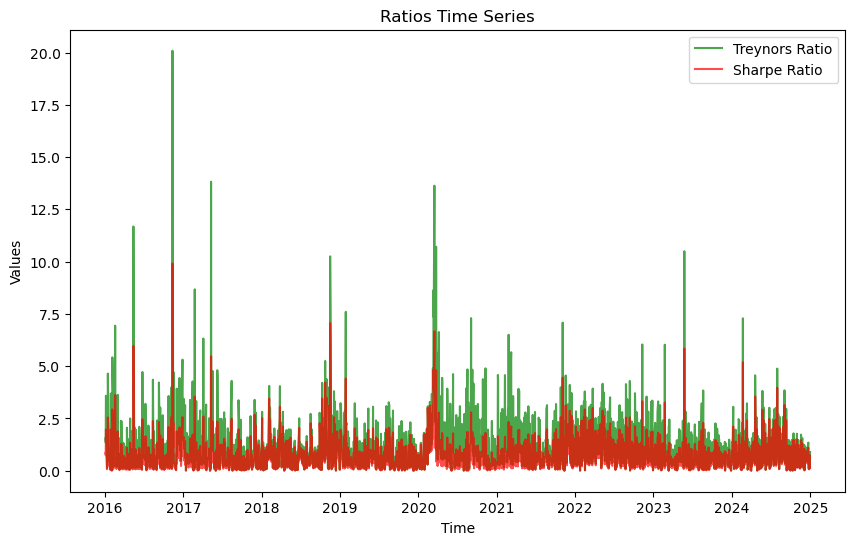

In [23]:
# Create Plot to demonstrate the Sharpe Ratio is always smaller than the Treynors Ratio
plt.figure(figsize=(10, 6))
plt.plot(abs(data['treynors_ratio']), label='Treynors Ratio', color='green', alpha=0.7)
plt.plot(abs(data['sharpe_ratio']), label='Sharpe Ratio', color='red', alpha=0.7)

# Config
plt.title('Ratios Time Series')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()

# Show
plt.show()

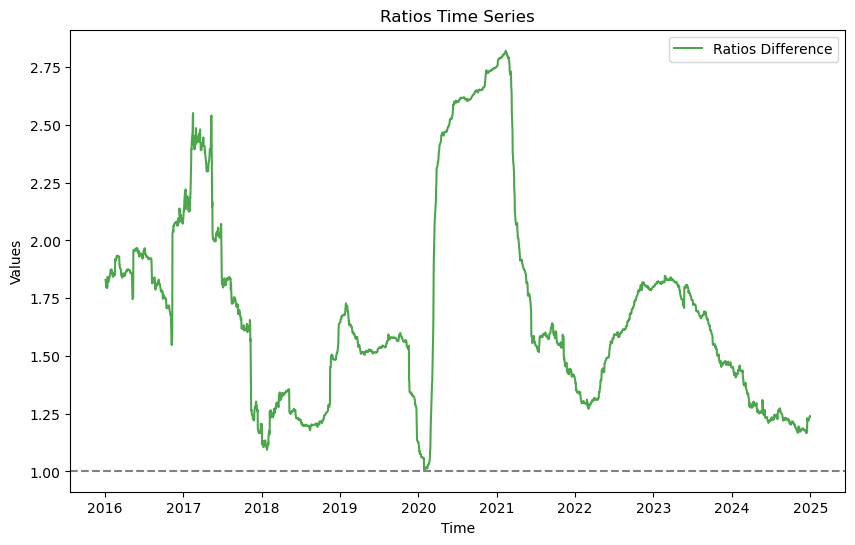

In [24]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(abs(data['treynors_ratio'] / abs(data['sharpe_ratio'])), label='Ratios Difference', color='green', alpha=0.7)
plt.axhline(y=1, color='grey', linestyle='--')

# Config
plt.title('Ratios Time Series')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()

# Show
plt.show()